# <font color='blue'>PRACTICA PDI 09</font>

**Integrantes**

1.Miguel Angel Mendoza Marcelo



### 1. Aplique las operaciones morfologicas de: Dilatación, erosión, apertura y cierre a la imagen broken. png
* La imagen debe ser previamente convertida a escala de grises, y binarizada usando un umbral de 128
* Experimente con distintos elementos estructurantes


In [49]:
!pip install opencv-contrib-python==4.5.5.64
import numpy as np
import matplotlib.pyplot as plt
import cv2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.7/66.7 MB 8.0 MB/s eta 0:00:00
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.10.0.84
    Uninstalling opencv-contrib-python-4.10.0.84:
      Successfully uninstalled opencv-contrib-python-4.10.0.84


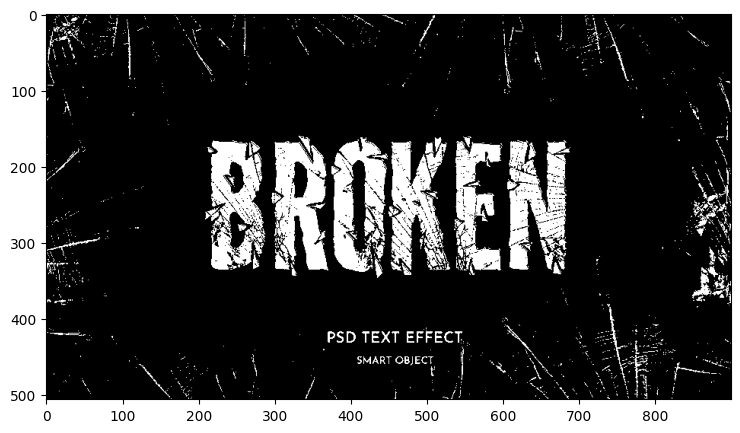

In [7]:
img = cv2.imread("../content/sample_data/broken.jpg",0)
img = np.uint8(img > 128)

plt.subplots(figsize=(10,5))
plt.imshow(img, cmap="gray")
plt.show()

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
selem1 = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
selem2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(9,9))
selem3 = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))

img_dil = cv2.dilate(img, selem2, iterations = 2)
img_ero = cv2.erode(img, selem2, iterations = 3)
img_ope = cv2.morphologyEx(img, cv2.MORPH_OPEN, selem2)
img_clo = cv2.morphologyEx(img, cv2.MORPH_CLOSE, selem2)

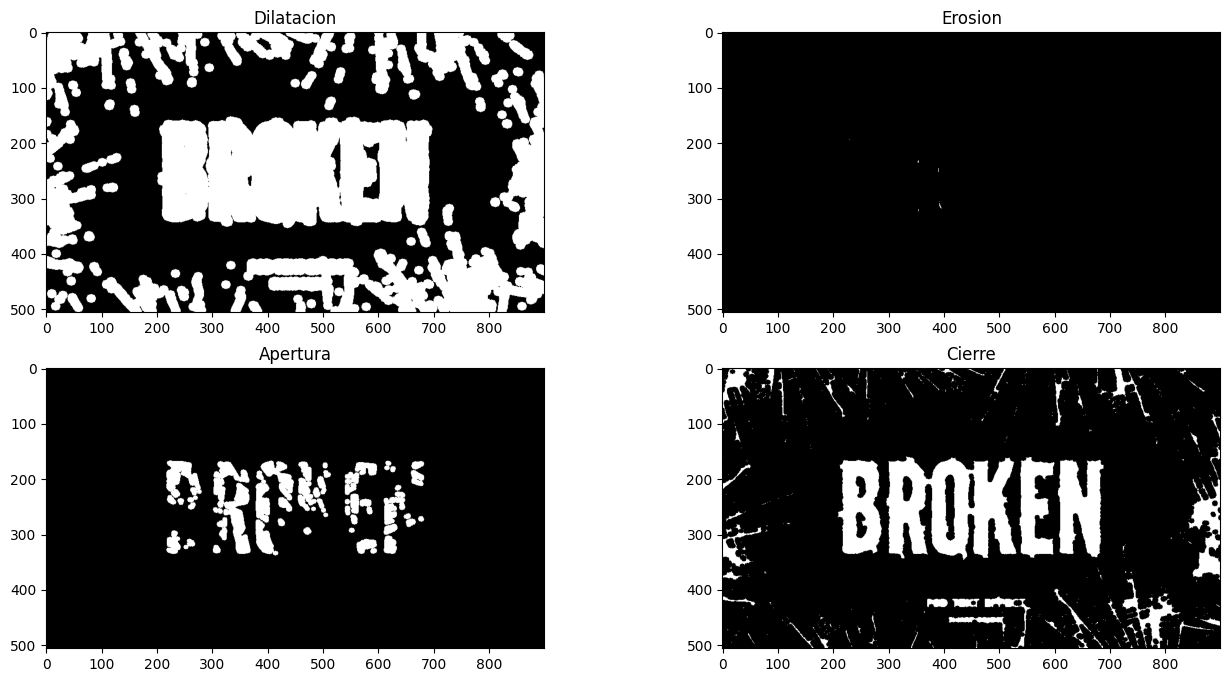

In [16]:
fig,axes=plt.subplots(2,2,figsize=(16,8))
plt.subplot(221)
plt.imshow(img_dil, cmap="gray")
plt.title("Dilatacion")
plt.subplot(222)
plt.imshow(img_ero, cmap="gray")
plt.title("Erosion")
plt.subplot(223)
plt.imshow(img_ope, cmap="gray")
plt.title("Apertura")
plt.subplot(224)
plt.imshow(img_clo, cmap="gray")
plt.title("Cierre")
plt.show()

```
1. Tiene algún efecto la forma y tamaño del elemento estructurante en las operaciones de morfología?

Si, se evidencia sobretodo en la operación de erosión,se me hace similar a un pincel ; si el tamaño aumenta el efecto es más tosco si el tamaño es menor el efecto es más sutil y tambien considerar la forma de este pincel (elemento estructurante).


2. En que situaciones usaría una apertura y un cierre?

La apertura por la naturaleza de destacar y mantener la estrcuctura predominante la usaría para reducir ruidos, hay que tener en cuenta que estos ruidos deben ser mas pequeños que el elemento estructurante.

El cierre por su naturaleza busca expandir (o llenar) y seguidamente limpiar la imagen,la usaría par suavizar contornos sin reducir tamaño de la formas, para rellenar algunos huecos  y unir regiones menores a las del tamaño del elemento estructurante.





### 2. 1. Aplique las operaciones morfologicas de  Black y White Top Hat implementadas en OpenCV  a "Cosmos.jpg"

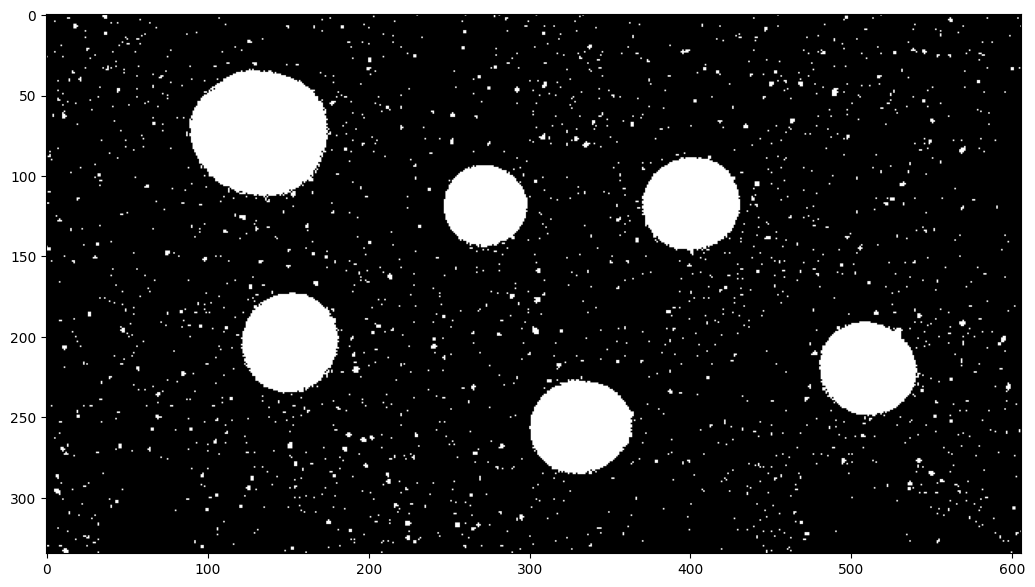

In [19]:
img = cv2.imread("/content/sample_data/Cosmos.jpg",0)
img = np.uint8(img > 128)

plt.subplots(figsize=(15,7))
plt.imshow(img, cmap="gray")
plt.show()

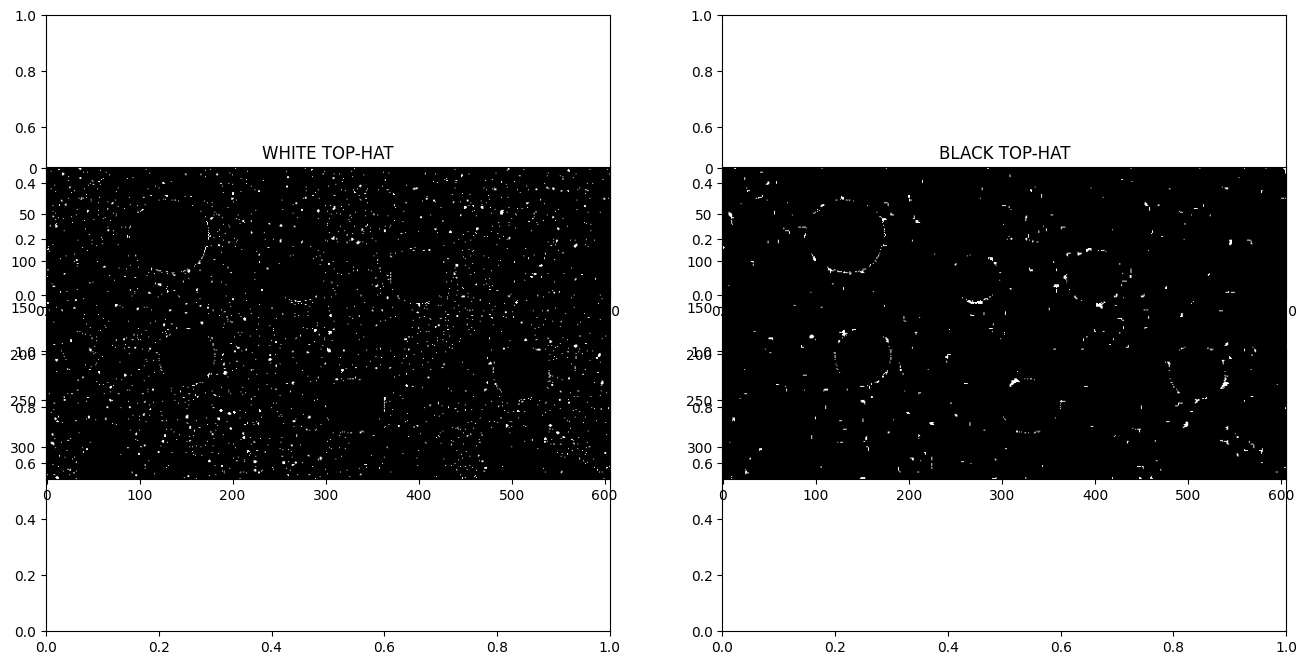

In [20]:
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, selem1)
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, selem1)

fig,axes=plt.subplots(2,2,figsize=(16,8))
plt.subplot(121)
plt.imshow(tophat, cmap="gray")
plt.title("WHITE TOP-HAT")
plt.subplot(122)
plt.imshow(blackhat, cmap="gray")
plt.title("BLACK TOP-HAT")
plt.show()

```
3. Cual es la diferencia entre white top-hat y black top-hat?

White top-hat resalta elementos claros que son  de menor tamaño que el elemento estructurante mientras que black top-hat resalta elementos oscuros(por ejemplo sombras) que son menor tamaño que el elemento estructurante

### 3. En la imagen cuadros.png use la transformacion de acierto y falla para marcar la esquina superior izquerda de cada cuadrilatero
* Reporte el total de cuadrilateros en la imagen
* Compruebe el funcionamiento del algoritmo usando la imagen cuadrosT.png

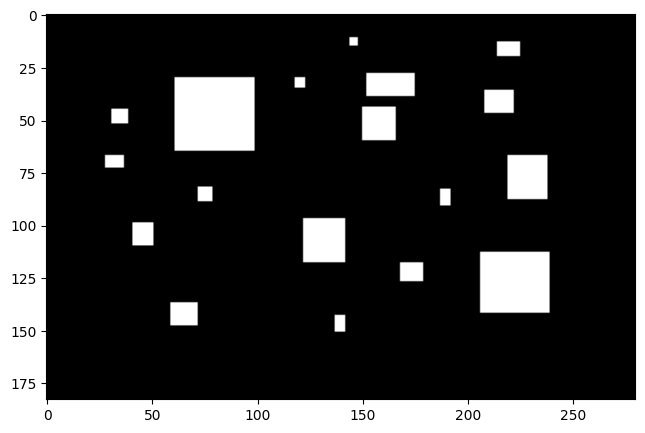

In [21]:
img = cv2.imread("/content/sample_data/cuadros.png",0)
img = np.uint8(img>128)
plt.subplots(figsize = (10,5))
plt.imshow(img, cmap="gray")
plt.show()

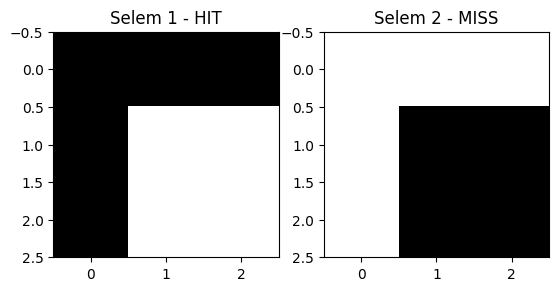

In [22]:
selem1=np.array([[0,0,0],[0,1,1],[0,1,1]], dtype=np.uint8)  #HIT
selem2=np.array([[1,1,1],[1,0,0],[1,0,0]], dtype=np.uint8)  #MISS

plt.subplot(1,2,1)
plt.imshow(selem1, cmap="gray")
plt.title("Selem 1 - HIT")
plt.subplot(1,2,2)
plt.imshow(selem2, cmap="gray")
plt.title("Selem 2 - MISS")
plt.show()

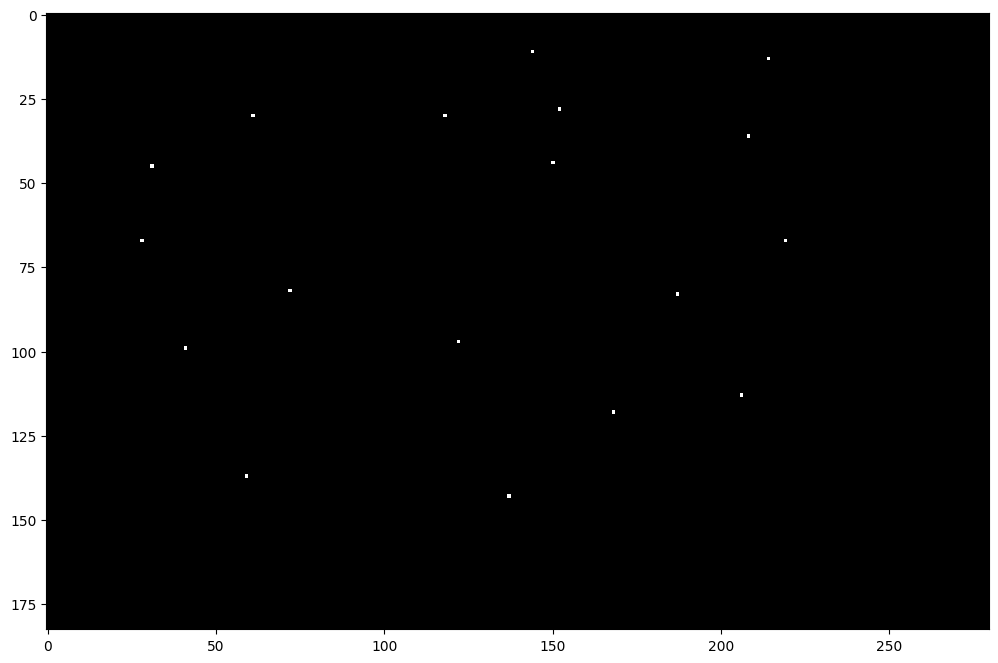

18 Cuadrados


In [23]:
img_ero_hit = cv2.erode(img, selem1)
img_ero_miss = cv2.erode(1-img, selem2)

res= cv2.bitwise_and(img_ero_hit,img_ero_miss)
plt.subplots(figsize=(18,8))
plt.imshow(res, cmap="gray")
plt.show()

print(np.sum(res), "Cuadrados")

```
4. Cree que esta transformación serviría para encontrar los rectángulos si estos estuviesen girados?

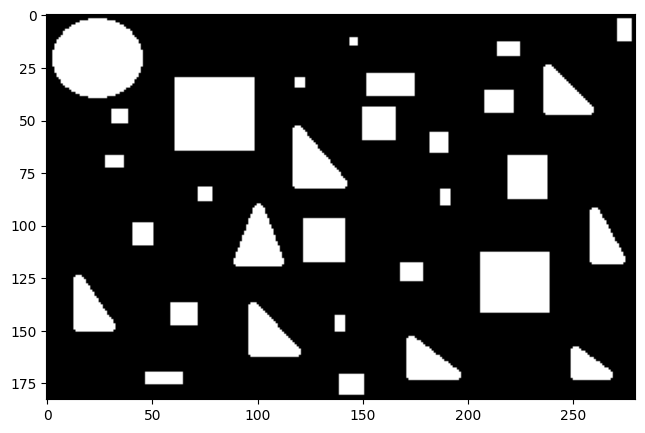

In [24]:
#COMPROBANDO EN CUADROS T
img2 = cv2.imread("/content/sample_data/cuadrosT.png",0)
img2 = np.uint8(img2>128)
plt.subplots(figsize = (10,5))
plt.imshow(img2, cmap="gray")
plt.show()

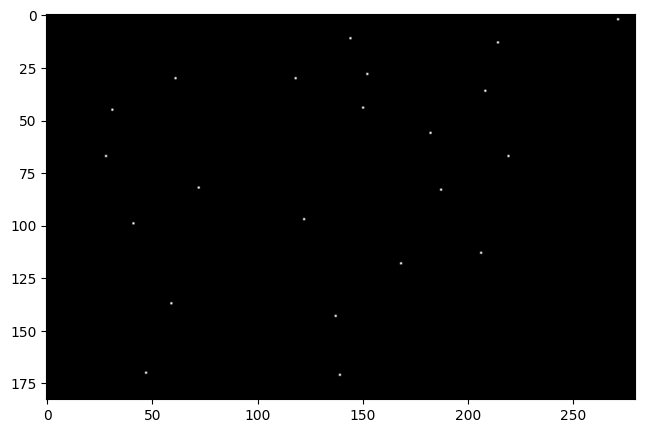

22 Cuadrilateros


In [25]:
img_ero_hit = cv2.erode(img2, selem1, iterations = 1)
img_ero_miss = cv2.erode(1-img2, selem2, iterations = 1)

res= img_ero_hit * img_ero_miss
plt.subplots(figsize=(12,5))
plt.imshow(res, cmap="gray")
plt.show()

print(np.sum(res), "Cuadrilateros")

### 4. Encuentre el borde de una imagen utilizando el gradiente morfológico
* Dilatación - erosión

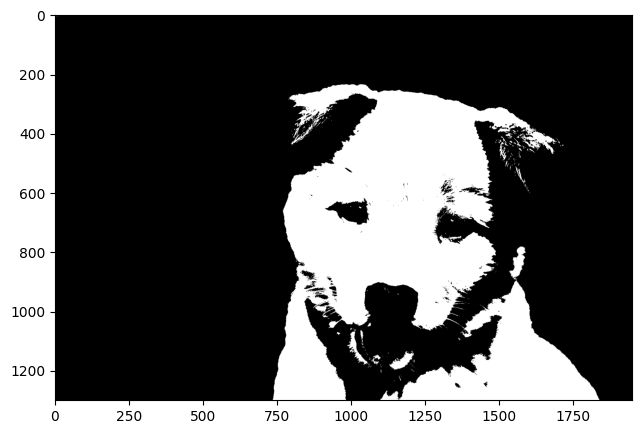

In [26]:
img = cv2.imread("/content/sample_data/puppy.jpg",0)
img = np.uint8(img>80)
plt.subplots(figsize = (10,5))
plt.imshow(img, cmap="gray")
plt.show()

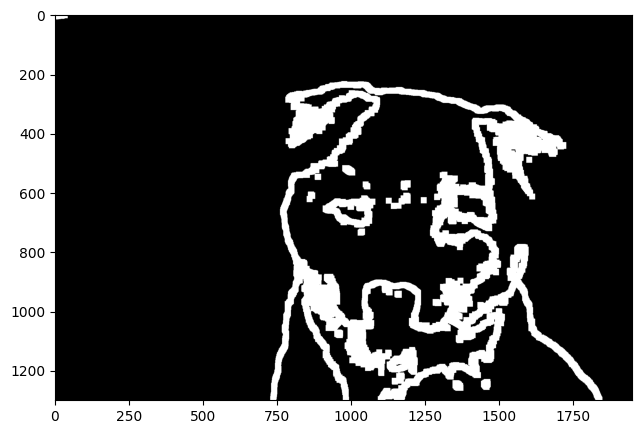

In [29]:
selem1 = cv2.getStructuringElement(cv2.MORPH_RECT,(20,20))
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, selem1)

plt.subplots(figsize = (10,5))
plt.imshow(gradient, cmap="gray")
plt.show()

```
5. Que pasa si el elemento estructurante es de 11x11?
Al ser la dilatación y la erosión con un elemento estructurante mas grande la obtencion de los bordes es menos fina y se evidencia un resultado con lineas mas gruesas y con menos nitidez debido a la perdida de detalles, basado en lo mencionado anteriormente es como si usaramos un pincel mas grueso.

### 5. Implemente un algoritmo para encontrar los puntos finales de la figura lineas.png
* Reutilize la funcion filtro_espacial elaborado en el laboratorio 2

In [30]:
def filtro_espacial(imagen,selem):
    M,N=imagen.shape
    m,n=selem.shape

    nueva_imagen=np.zeros((M+m-1,N+n-1)) #Imagen con filas y columnas extra

    cm=np.uint16((m-1)/2)
    cn=np.uint16((n-1)/2)

    nueva_imagen[cm:cm+M,cn:cn+N]=imagen

    salida=np.zeros((nueva_imagen.shape))

    for i in np.uint16(np.arange(cm,cm+M)):
        for j in np.uint16(np.arange(cn,cn+N)):

            seccion_imagen=nueva_imagen[i-cm:i+cm+1,j-cn:j+cn+1]
            result_seccion=seccion_imagen*selem
            score=np.sum(result_seccion)

            if(nueva_imagen[i,j]==1):
                if (score==2):
                    salida[i,j]=1
                else:
                    salida[i,j]=0
            else:
                salida[i,j]=0

    #recortar del mismo tamaño
    result_img=salida[cm:cm+M,cn:cn+N]

    return result_img

```
6. ¿Por qué es necesario verificar que score==2 en el algoritmo anterior?

Nos garantiza que ademas del punto central  otro punto cercano sea 1 (solo otro punto tiene que ser 1 si es punto final), entonces al contar los puntos válidos dentro del elemento estructurante la suma debe ser de 2, el central y el unico colindante.


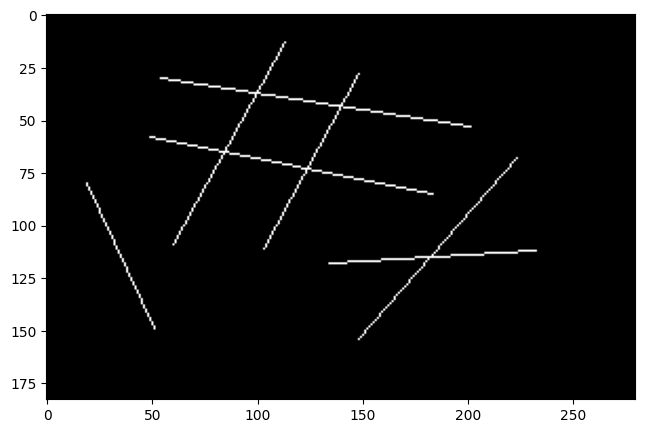

In [31]:
img3=cv2.imread("/content/sample_data/lineas1.png",0)
img3=img3>128

plt.subplots(figsize=(10,5))
plt.imshow(img3, cmap="gray")
plt.show()

In [32]:
selem=np.array([[1,1,1],[1,1,1],[1,1,1]])
img3_final_points=filtro_espacial(img3,selem)

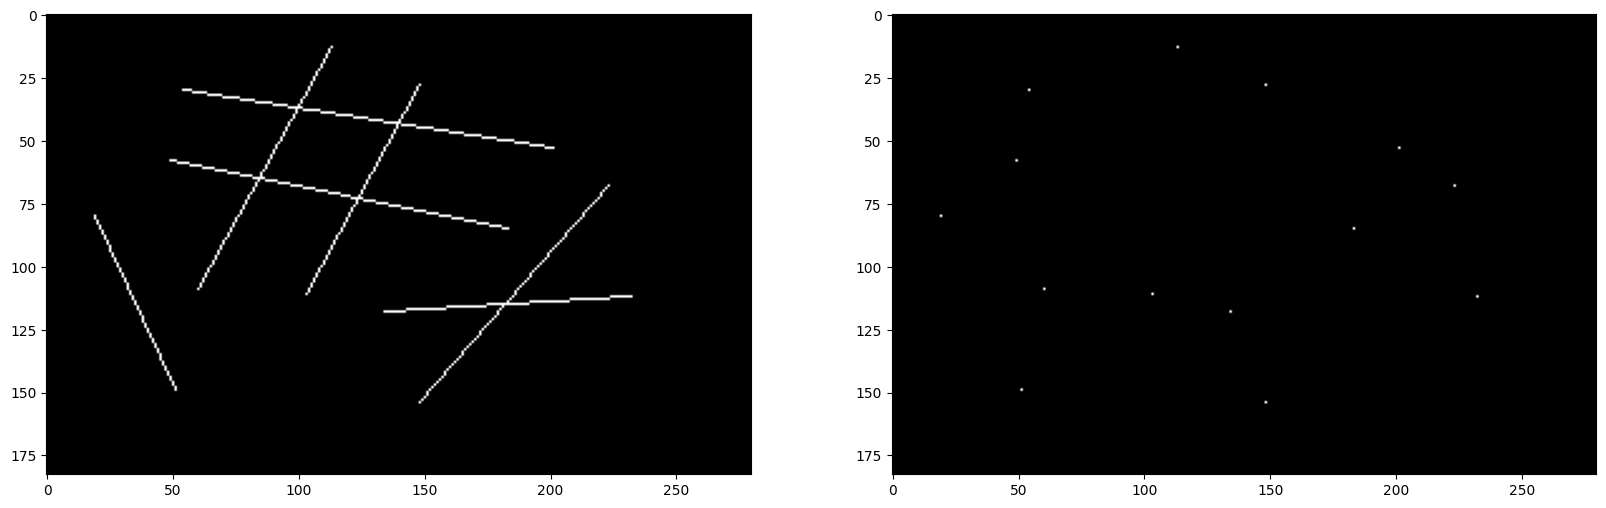

In [33]:
plt.subplots(1,2,figsize=(20,8))
plt.subplot(121)
plt.imshow(img3, cmap="gray")
plt.subplot(122)
plt.imshow(img3_final_points, cmap="gray")
plt.show()

### 6. Adelgazamiento y esqueletización de una imagen binaria
* Trabaje con la imagen huella.jpg, muestre una imagen comparativa de sus resultados

In [48]:
#Adelgazamiento


# Cargar imagen en escala de grises
img = cv2.imread("/content/sample_data/huella.jpg", 0)

# Umbralizar para convertirla en una imagen binaria
_, img_bin = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Aplicar adelgazamiento
thinned = cv2.ximgproc.thinning(img_bin)

# Mostrar la imagen adelgazada
plt.figure(figsize=(10, 5))
plt.imshow(thinned, cmap="gray")
plt.axis("off")
plt.show()


AttributeError: module 'cv2.ximgproc' has no attribute 'thinning'

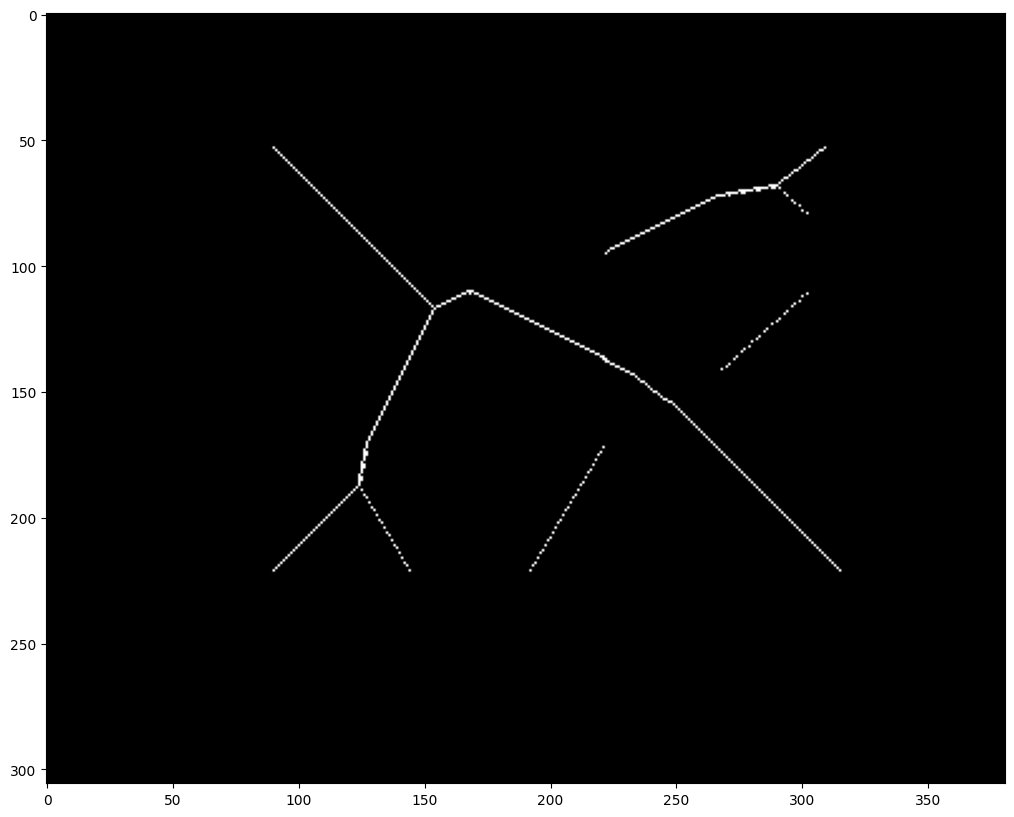

In [44]:
#Skel
img = cv2.imread("/content/sample_data/irregular.png", 0)

_,img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

skel = np.zeros(img.shape, np.uint8)

element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))

while True:
    eroded = cv2.erode(img, element)
    opened = cv2.morphologyEx(eroded, cv2.MORPH_OPEN, element)
    temp = cv2.subtract(eroded, opened)
    skel = cv2.bitwise_or(skel,temp)

    img = eroded.copy()

    if cv2.countNonZero(img)==0:
        break

plt.subplots(figsize=(18,10))
plt.imshow(skel, cmap="gray")
plt.show()

```
7. Despues de aplicar el algoritmo de skel y el de adelgazamiento sobre una misma imágen. Son estas operaciones iguales?

No, en el adelgazamiento se busca adelgazar la figura a menos pixeles pero manteniendo su forma general  , mientras que en la esqueletización se busca reducir la figura a una forma geometrica centralizada , siendo esta ultima la forma mas simple de reducir una imagen si la comparamos con el adelgazamiento

### 7. Etiquete la imagen form.png y muestre aisladamente una de las formas


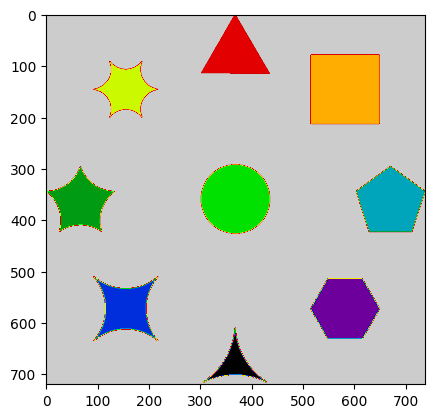

10


In [50]:
img = cv2.imread("/content/sample_data/form.png", 0)
_,img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

num_labels, labels_im = cv2.connectedComponents(img, connectivity=8)

plt.imshow(labels_im, cmap="nipy_spectral_r")
plt.show()
print(num_labels)

```
8. Cuál es la función del parámetro connectivity?

El parámetro connectivity influye en cómo el algoritmo de connectedComponents agrupa los píxeles en diferentes componentes conectados .
connectivity=4: El píxel se conecta solo con sus 4 vecinos (arriba, abajo, izquierda, derecha).
connectivity=8: El píxel se conecta con todos sus 8 vecinos (incluyendo las diagonales).

In [51]:
print(labels_im[300:400, 300:400])

[[0 0 0 ... 4 4 4]
 [0 0 0 ... 4 4 4]
 [0 0 0 ... 4 4 4]
 ...
 [0 0 0 ... 4 4 4]
 [0 0 0 ... 4 4 4]
 [0 0 0 ... 4 4 4]]


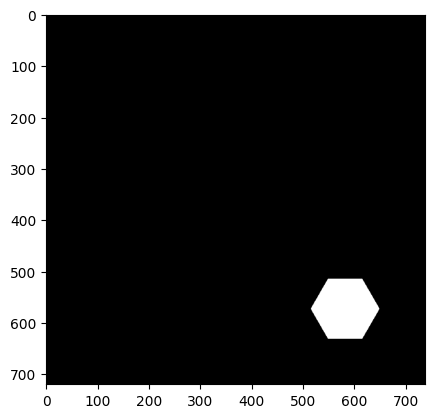

10


In [53]:
plt.imshow(labels_im==8, cmap="gray")
plt.show()
print(num_labels)

### 8. Con la imagen "mark.png" realize la Reconstruccion de las 3 formas correspondientes

In [61]:

def reconstruccion_morf(img, marcador, selem):
    while True:
        dilate = cv2.dilate(marcador, selem)
        reconstruida = cv2.bitwise_and(dilate, img)

        if np.array_equal(marcador, reconstruida):
            return reconstruida
        else:
            marcador = reconstruida

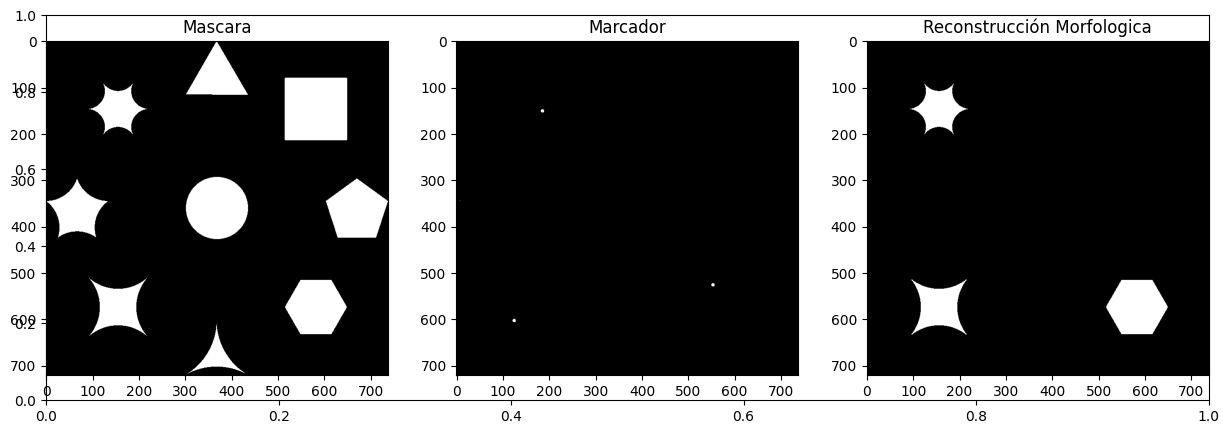

In [68]:
img = cv2.imread("/content/sample_data/form.png", 0)
_,img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

marker = cv2.imread("/content/sample_data/mark.png",0)
_,marker0 = cv2.threshold(marker, 127, 255, cv2.THRESH_BINARY)

selem = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))

reconstruida = reconstruccion_morf(img, marker0, selem)

plt.subplots(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(img, cmap="gray")
plt.title("Mascara")
plt.subplot(1,3,2)
plt.imshow(marker, cmap="gray")
plt.title("Marcador")
plt.subplot(1,3,3)
plt.imshow(reconstruida, cmap="gray")
plt.title("Reconstrucción Morfologica")
plt.show()

```
9. Si usted tuviera un conjunto de elementos de igual forma pero diferente tamaño, en el que usted quiere únicamente los mas grandes sin ningún tipo de modificación, describa la secuencia de pasos para lograr este objetivo usuando únicamente operaciones de morfología? (el tamaño de los objetos seleccionados debe ser el mismo)

A:Binarizar la imagen
C: Contabilizar los objetos presentes.
D:Etiquetar los objetos presentes.
E:En paralelo trabajaremos el marcador para ello a la imagen original binarizada le aplicamos procesamiento de apertura de forma iterada (Permite ampliar objeto grandes y reducir los pequeños)hasta que los objetos pequeños desaparezcan. (ojo que la imagen se deformo)
F:Aplicamos erosión con HIT y MISS hasta reducir a un pixel cada elemento (de este modo tendremos listo nuestra imagen marcador)
G:Aplicamos reconstrucción,cargando la mascara (original) y el marcador (Selem se asumen el usado en clase)

H:Deberiamos tener los elementos grandes originales sin modificación, el detalle a tener en cuenta a la hora de implementar es: ¿ a qué se refiere con los objetos grandes? se tendría que definir el umbral para discriminar cual se puede considerar grande y cual pequeño


### 9. implemente el algoritmo llenado de huecos descrito en la clase teorica, luego apliquela a la imagen latas1.jpg
* Binarize con un umbral de 40 y haga una apertura con un selem de radio 3
* g= -(reconstruccion(fm,~f ))
* fm ={1 - f ; solo si el pixel pertenece al borde

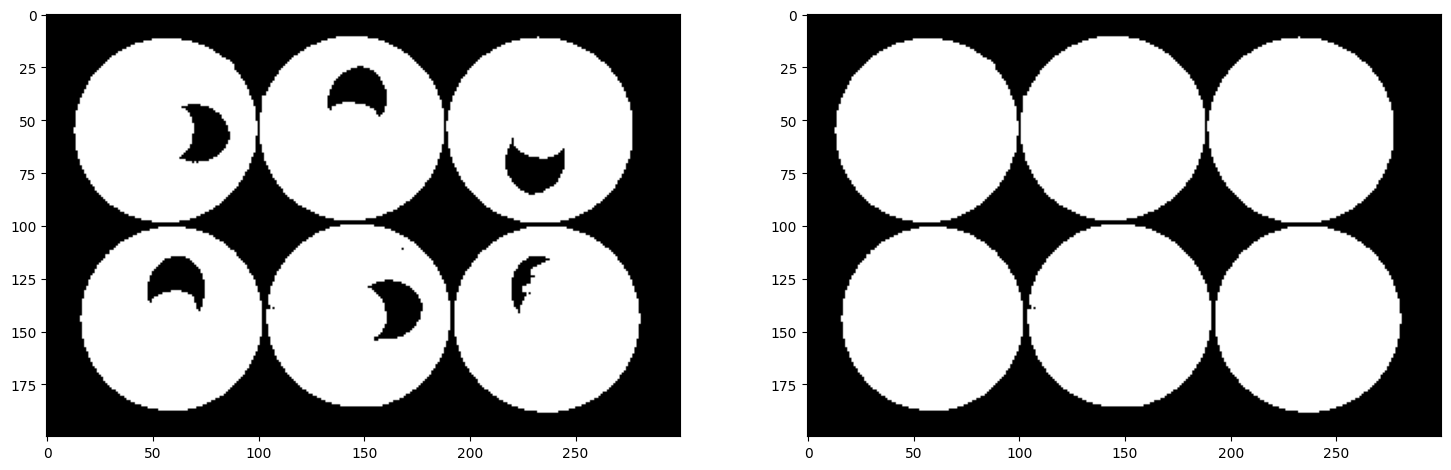

In [63]:
img = cv2.imread("/content/sample_data/latas1.jpg",0)
_,img = cv2.threshold(img, 40, 255, cv2.THRESH_BINARY)

selem = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))

img_open = cv2.morphologyEx(img, cv2.MORPH_OPEN, selem)  #Para limpiar ruido

marker=np.zeros(img.shape, dtype=np.uint8)
marker[0,:] = ~img_open[0,:]
marker[-1,:] = ~img_open[-1,:]
marker[:,0] = ~img_open[:,0]
marker[:,-1] = ~img_open[:,-1]

img_recons = reconstruccion_morf(~img_open, marker, selem)

g = cv2.bitwise_not(img_recons)

plt.subplots(1,2,figsize=(18,8))
plt.subplot(1,2,1)
plt.imshow(img_open, cmap="gray")
plt.subplot(1,2,2)
plt.imshow(g, cmap="gray")
plt.show()

### 10. De la imagen comp2.jpg intente obtener solo los integrados, y luego limpie aquellos que estan pegados al borde de la imagen
* Binarize con un umbral de 80 y haga una apertura con un selem de radio 3
* g= -(reconstruccion(fm,~f ))
* fm ={1 - f ; solo si el pixel pertenece al borde

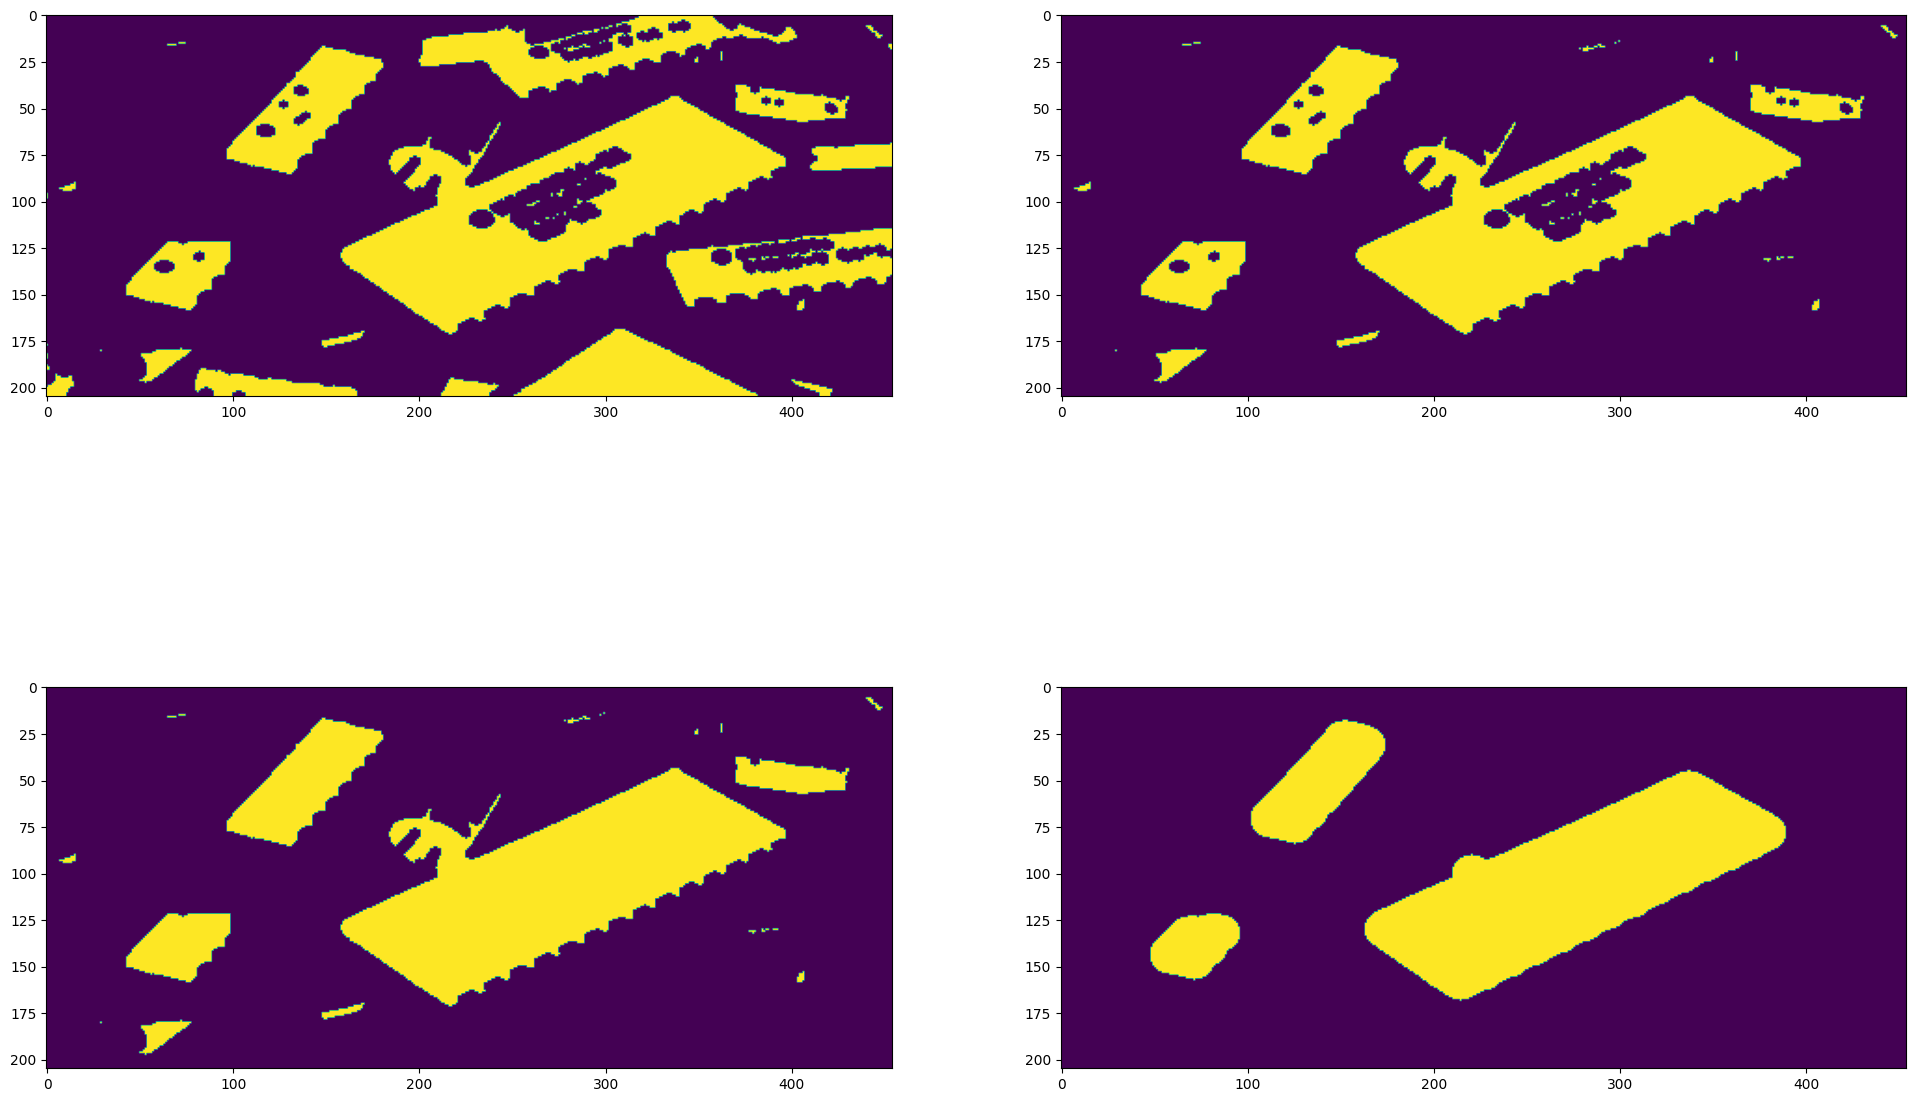

In [66]:
img_gray = cv2.imread("/content/sample_data/comp2.jpg",0)
_,img = cv2.threshold(img_gray, 80, 255, cv2.THRESH_BINARY_INV)

selem = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))

img = cv2.erode(img,selem)
img_e = img.copy() #para mostrar

#Limpieza de bordes
marker=np.zeros((img.shape[0],img.shape[1]), dtype=np.uint8)

marker[0,:] = img[0,:]
marker[-1,:] = img[-1,:]
marker[:,0] = img[:,0]
marker[:,-1]= img[:,-1]

img_recons = reconstruccion_morf(img,marker,selem)
g = img-img_recons

#Llenado de huecos
marker2=np.zeros((img.shape[0],img.shape[1]), dtype=np.uint8)
marker2[0,:] = ~g[0,:]
marker2[-1,:] = ~g[-1,:]
marker2[:,0] = ~g[:,0]
marker2[:,-1] = ~g[:,-1]

img_recons2 = ~reconstruccion_morf(~g, marker2,selem) #Llenado de huecos

#Apertura
selem2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (21,21))
img_recons3= cv2.morphologyEx(img_recons2,cv2.MORPH_OPEN,selem2)

plt.subplots(2,2,figsize=(24,16))
plt.subplot(221)
plt.imshow(img_e)
plt.subplot(222)
plt.imshow(g)
plt.subplot(223)
plt.imshow(img_recons2)
plt.subplot(224)
plt.imshow(img_recons3)
plt.show()

```
10. Como obtendría los integrados segmentados con sus colores rgb a partir del resultado de la imagen anterior?

A:Cargaria la imagen original y le restaria pixel a pixel la imagen obtenido en el paso 10.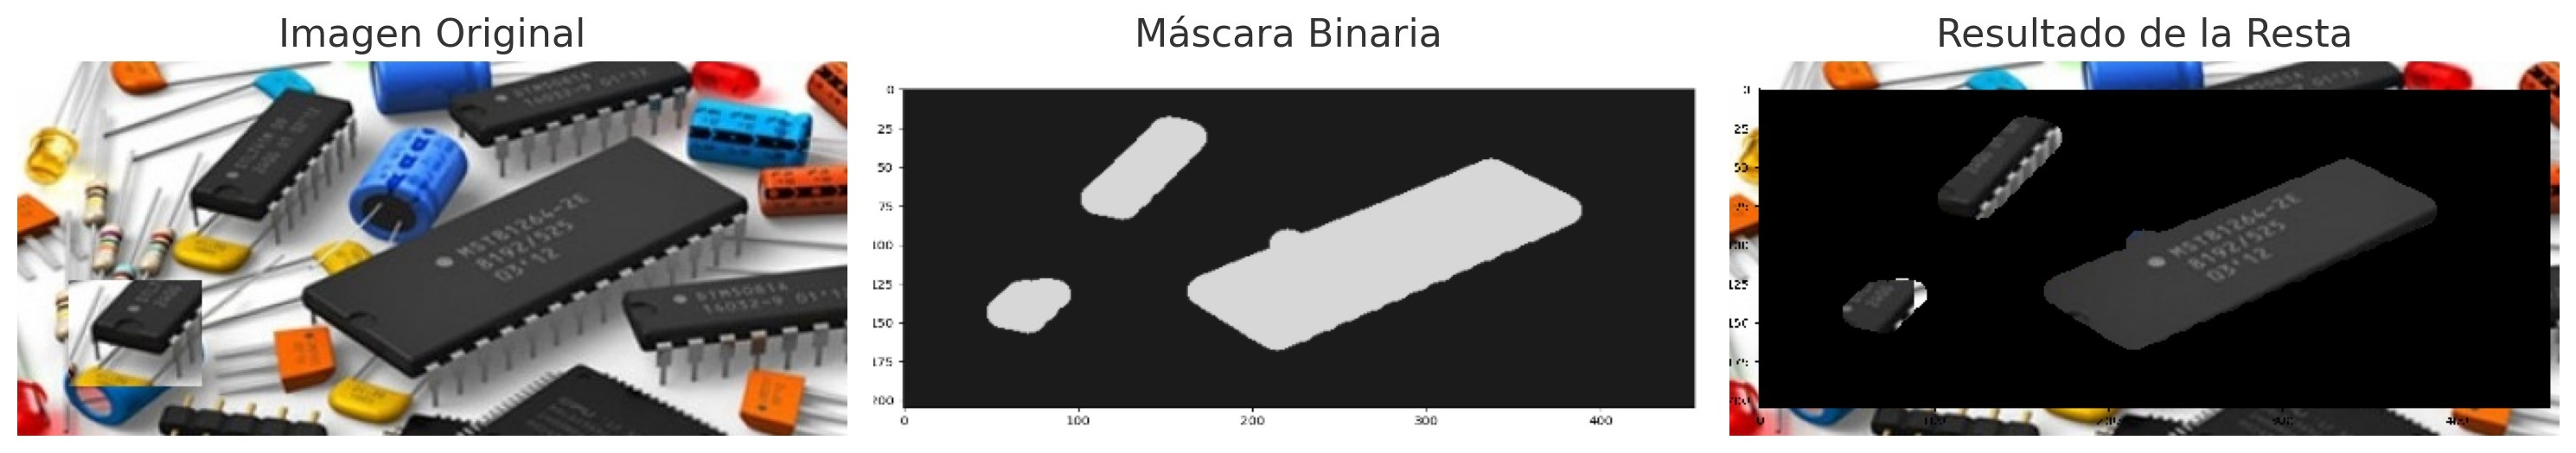

### 11. Implemente las operaciones morfologicas basicas en tiempo real.

In [ ]:
cap = cv2.VideoCapture(0)

selem1 = np.ones((5,5),np.uint8)

while(1):

    _, frame = cap.read()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    lower = np.array([90,100,100])
    upper = np.array([130,255,255])

    mask = cv2.inRange(hsv, lower, upper)


    opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, selem1)
    closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, selem1)
    gradient = cv2.morphologyEx(mask, cv2.MORPH_GRADIENT, selem1)

    res = cv2.bitwise_and(frame,frame, mask=closing)

    cv2.imshow('Original',frame)
    cv2.imshow('Mask',mask)
    cv2.imshow('Opening',opening)
    cv2.imshow('Closing',closing)
    cv2.imshow('Gradient',gradient)
    cv2.imshow('Segmentacion',res)

    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()
cap.release()

```
Cada estudiante debe escribir una reflexión propia sobre el aprendizaje obtenido con la presenta guía
```



Miguel Angel Mendoza Marcelo

En esta guia se evidenció las operaciones de forma que se pueden realizar a las imagenes, cuando en algunas app de android se veía hace unos años me parecía algo muy avanzado y complejo como lograban hacer algunos procesos, como algunos donde se hacia boceto de rostros y deteccion de objetos, este tema explicado en clase evidencia que no es tan complejo solo basta profundizar en el tema segun la necesidad de lo que se requiera desarrollar, no se aplico nada de IA solo lógica para entender el funcionamiento de los algoritmos , aunque evidentemente con la suma de IA se potencia estas operaciones para proyectos interesantes, me ha gustado y procedo a revisar la demas documentación porque quiero ver que mas hay, gracias

